# Analyse covid - Mobility

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse saisonnière 

### Mobilité par mois FRANCE et Allemagne

#### Import data

In [3]:
csv_file_name = "q4_2_months_years_tendance_mobilite_FR_GR.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_mois_fr_ge = pd.read_csv(path + csv_file_name)

In [4]:
data_mobility_mois_fr_ge.head()

,country_region,year,month,avg_retail_recreation,avg_grocery_pharmacy,avg_parks,avg_transit_stations,avg_workplaces,avg_residential
0,France,2020,2,1.524242,1.735079,20.978169,8.949969,-10.495758,2.112667
1,France,2020,3,-44.221309,-20.371386,-26.918110,-38.624813,-33.304106,14.684886
2,France,2020,4,-81.337284,-42.967457,-56.516061,-76.864629,-61.226364,26.633531
3,France,2020,5,-51.154818,-16.733196,-4.598356,-53.200769,-38.556012,15.841902
4,France,2020,6,-15.215651,-1.089884,47.710158,-18.576380,-18.225758,6.490721


In [5]:
# Convertir les colonnes year et month en une colonne de date
data_mobility_mois_fr_ge['date'] = pd.to_datetime(data_mobility_mois_fr_ge[['year', 'month']].assign(day=1))

In [6]:
data_mobility_mois_fr_ge.head()

,country_region,year,month,avg_retail_recreation,avg_grocery_pharmacy,avg_parks,avg_transit_stations,avg_workplaces,avg_residential,date
0,France,2020,2,1.524242,1.735079,20.978169,8.949969,-10.495758,2.112667,2020-02-01
1,France,2020,3,-44.221309,-20.371386,-26.918110,-38.624813,-33.304106,14.684886,2020-03-01
2,France,2020,4,-81.337284,-42.967457,-56.516061,-76.864629,-61.226364,26.633531,2020-04-01
3,France,2020,5,-51.154818,-16.733196,-4.598356,-53.200769,-38.556012,15.841902,2020-05-01
4,France,2020,6,-15.215651,-1.089884,47.710158,-18.576380,-18.225758,6.490721,2020-06-01


#### Graphique

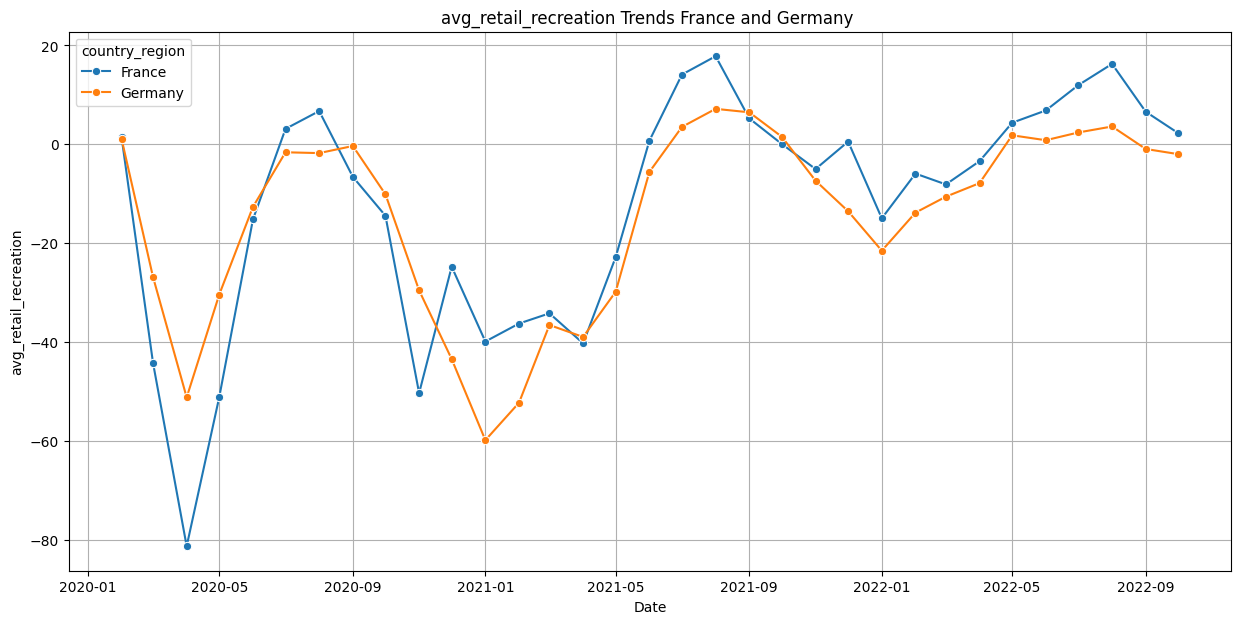

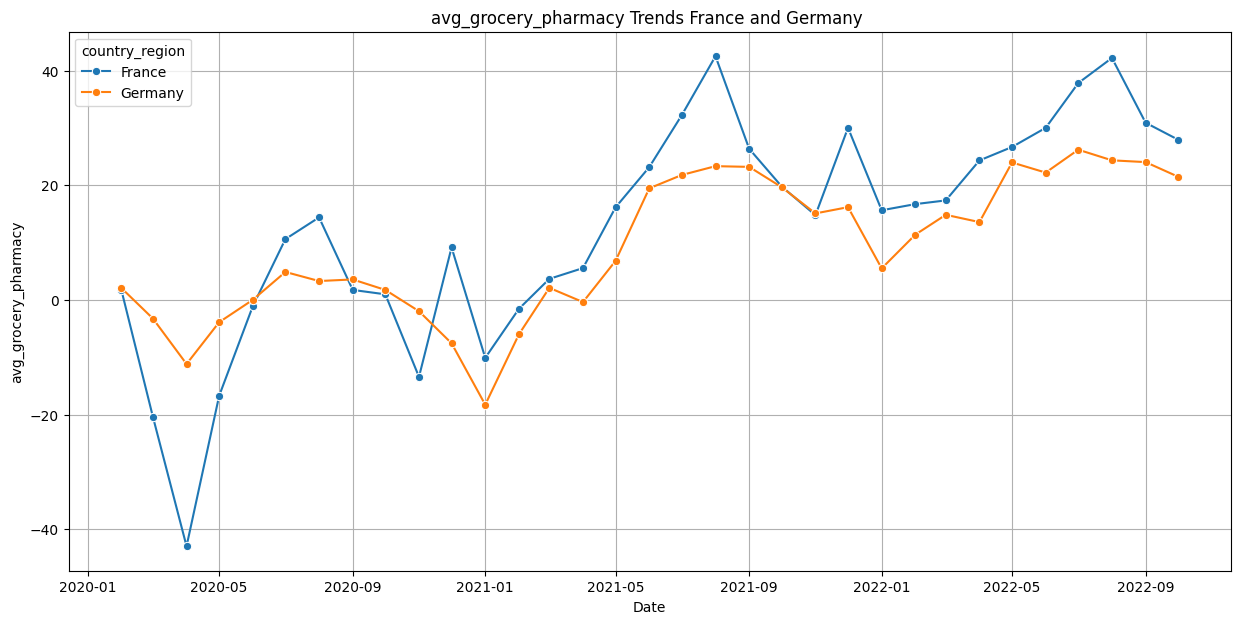

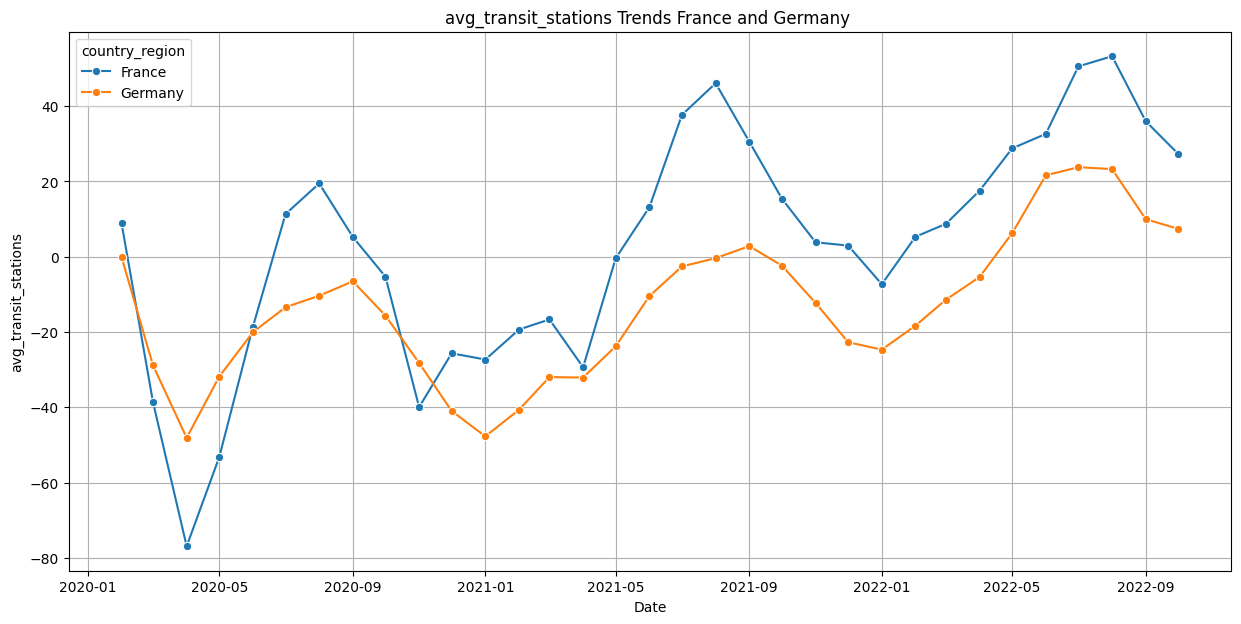

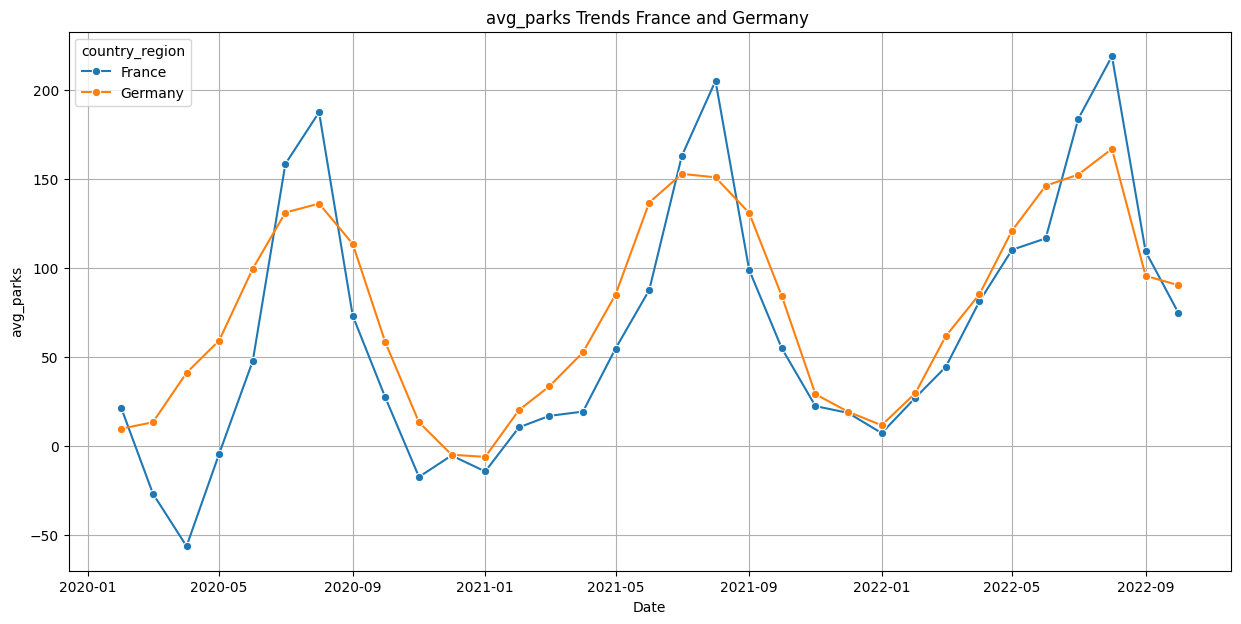

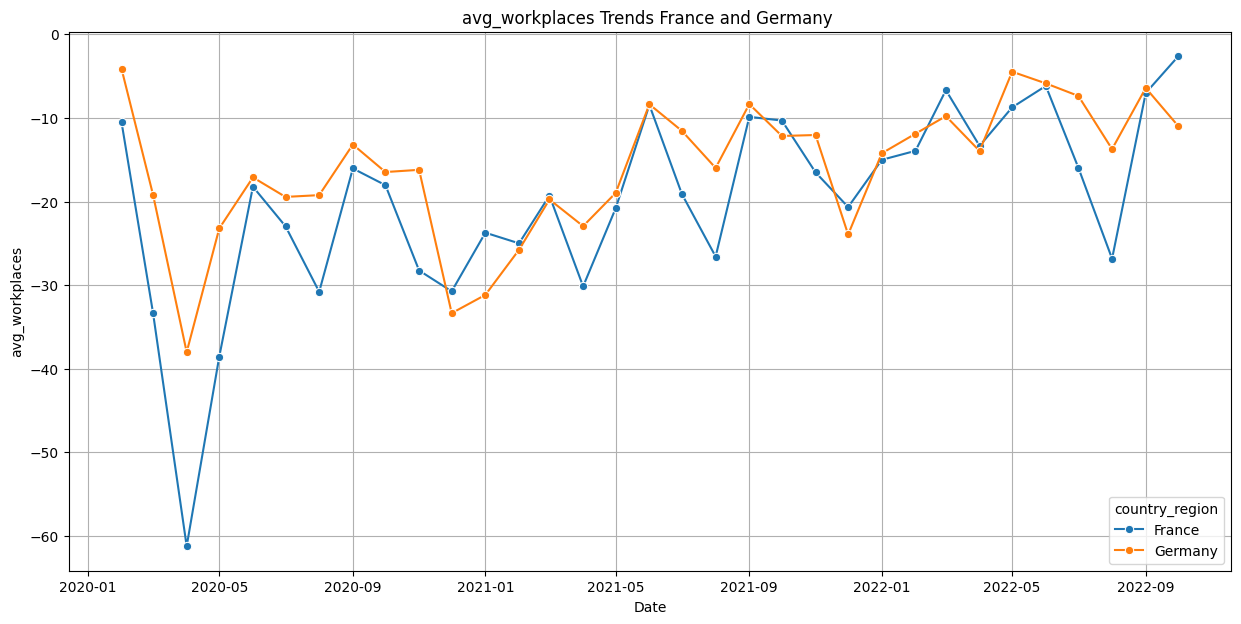

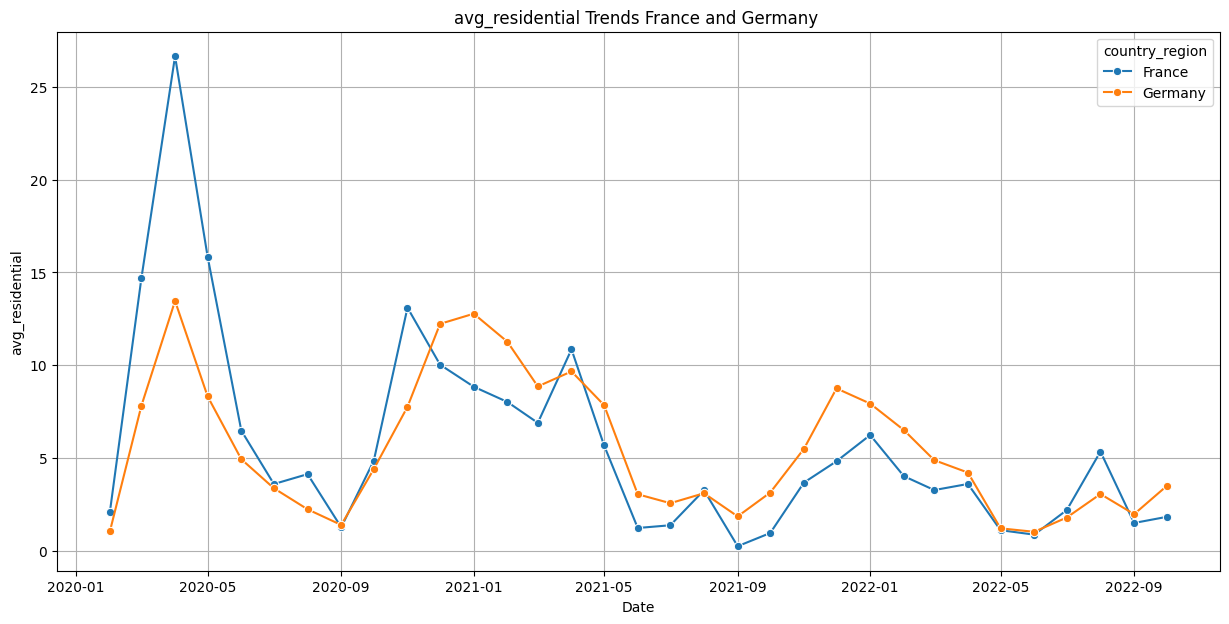

In [7]:
places = ["avg_retail_recreation", "avg_grocery_pharmacy", "avg_transit_stations", "avg_parks", "avg_workplaces", "avg_residential"]
# Mise en forme des données pour seaborn

# Création du graphique avec Seaborn

for place in places:
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=data_mobility_mois_fr_ge, x='date', y=place, hue='country_region', marker='o')

    # Ajout du titre et des labels
    plt.title(f'{place} Trends France and Germany ')
    plt.xlabel('Date')
    plt.ylabel(f'{place}')

    # Ajout d'une grille
    plt.grid(True)
    plt.savefig(f"{place}", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

    # Affichage du graphique
    plt.show()

#### Comment les déplacements dans les parcs ont-ils varié entre l'été et l'hiver ?

In [8]:
csv_file_name = "q4_2_season_parks_avg_tendance_mobilite_FR_GR.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_parks_fr_ge = pd.read_csv(path + csv_file_name)

In [9]:
data_mobility_parks_fr_ge.head()

,country_region,season,avg_parks_change
0,France,Summer,150.071647
1,France,Winter,8.061039
2,Germany,Summer,141.269428
3,Germany,Winter,10.122378


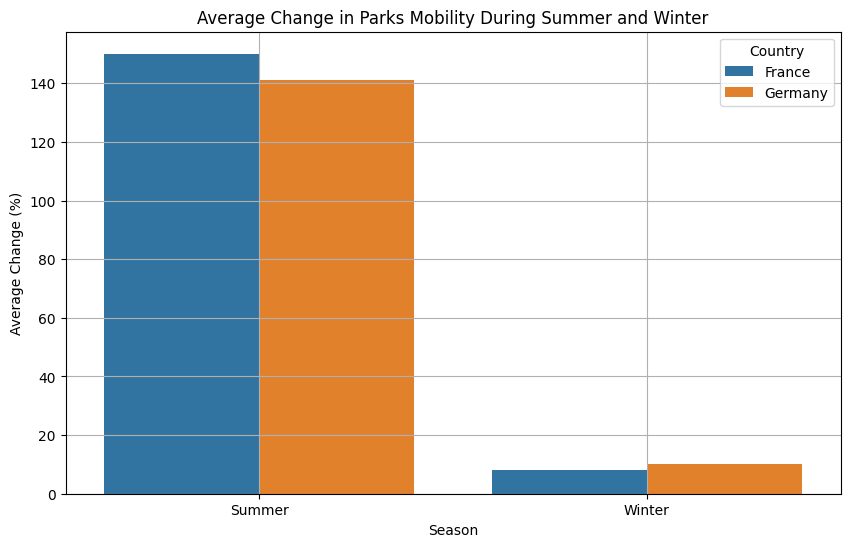

In [11]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_mobility_parks_fr_ge, x='season', y='avg_parks_change', hue='country_region')

# Ajout du titre et des labels
plt.title('Average Change in Parks Mobility During Summer and Winter')
plt.xlabel('Season')
plt.ylabel('Average Change (%)')

# Ajout de la légende
plt.legend(title='Country')

# Ajout d'une grille
plt.grid(True)
plt.savefig("Changement de mobilité dans les parcs pendant l'Été et l'Hiver", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

# Affichage du graphique
plt.show()

#### Impact sur le télé travail 

In [12]:
csv_file_name = "q4_3_period_workplace_avg_tendance_mobilite_FR_GR.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_workplace_fr_ge = pd.read_csv(path + csv_file_name)

In [13]:
data_mobility_workplace_fr_ge.head()

,country,period,avg_workplaces_change
0,France,First Lockdown,-60.234091
1,France,Second Lockdown,-25.928627
2,France,Third Lockdown,-30.330205
3,Germany,First Lockdown,-38.348930
4,Germany,Second Lockdown,-17.553421


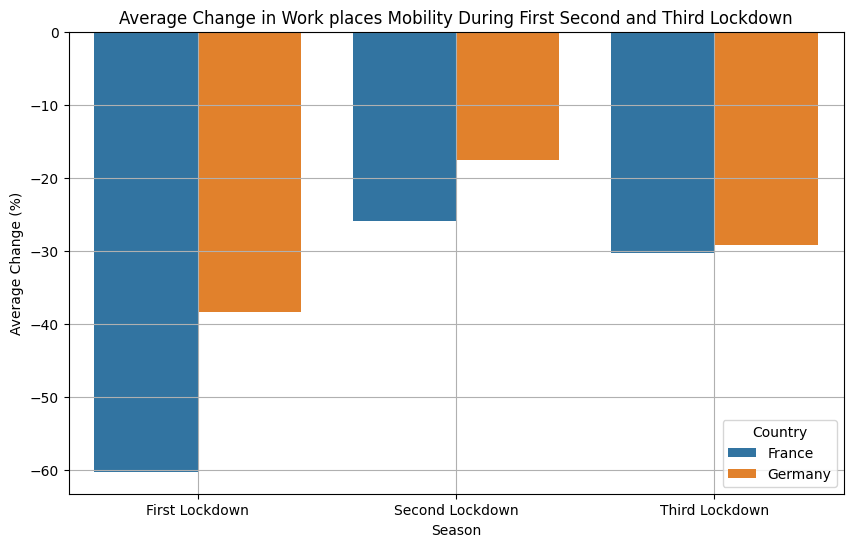

In [15]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_mobility_workplace_fr_ge, x='period', y='avg_workplaces_change', hue='country')

# Ajout du titre et des labels
plt.title('Average Change in Work places Mobility During First Second and Third Lockdown')
plt.xlabel('Season')
plt.ylabel('Average Change (%)')

# Ajout de la légende
plt.legend(title='Country')

# Ajout d'une grille
plt.grid(True)
plt.savefig("Changement de mobilité- périodes de confinement", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

# Affichage du graphique
plt.show()

#### Analyse des jours de la semaine

##### Méthode 1

In [18]:
csv_file_name = "q4_4_days_workplace_recreation_avg_tendance_mobilite_FR_GR.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_days_workplace_recreation_fr_ge = pd.read_csv(path + csv_file_name)

In [39]:
data_mobility_days_workplace_recreation_fr_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_region         28 non-null     object 
 1   period                 28 non-null     object 
 2   day_of_week            28 non-null     int64  
 3   avg_retail_recreation  28 non-null     float64
 4   avg_workplaces         28 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


In [40]:
data_mobility_days_workplace_recreation_fr_ge.head()

,country_region,period,day_of_week,avg_retail_recreation,avg_workplaces
0,France,after_pandemic,1,-4.701889,-3.670739
1,France,after_pandemic,2,-10.482245,-28.302849
2,France,after_pandemic,3,-10.039467,-24.876633
3,France,after_pandemic,4,-14.277763,-24.220838
4,France,after_pandemic,5,-13.287028,-26.435152


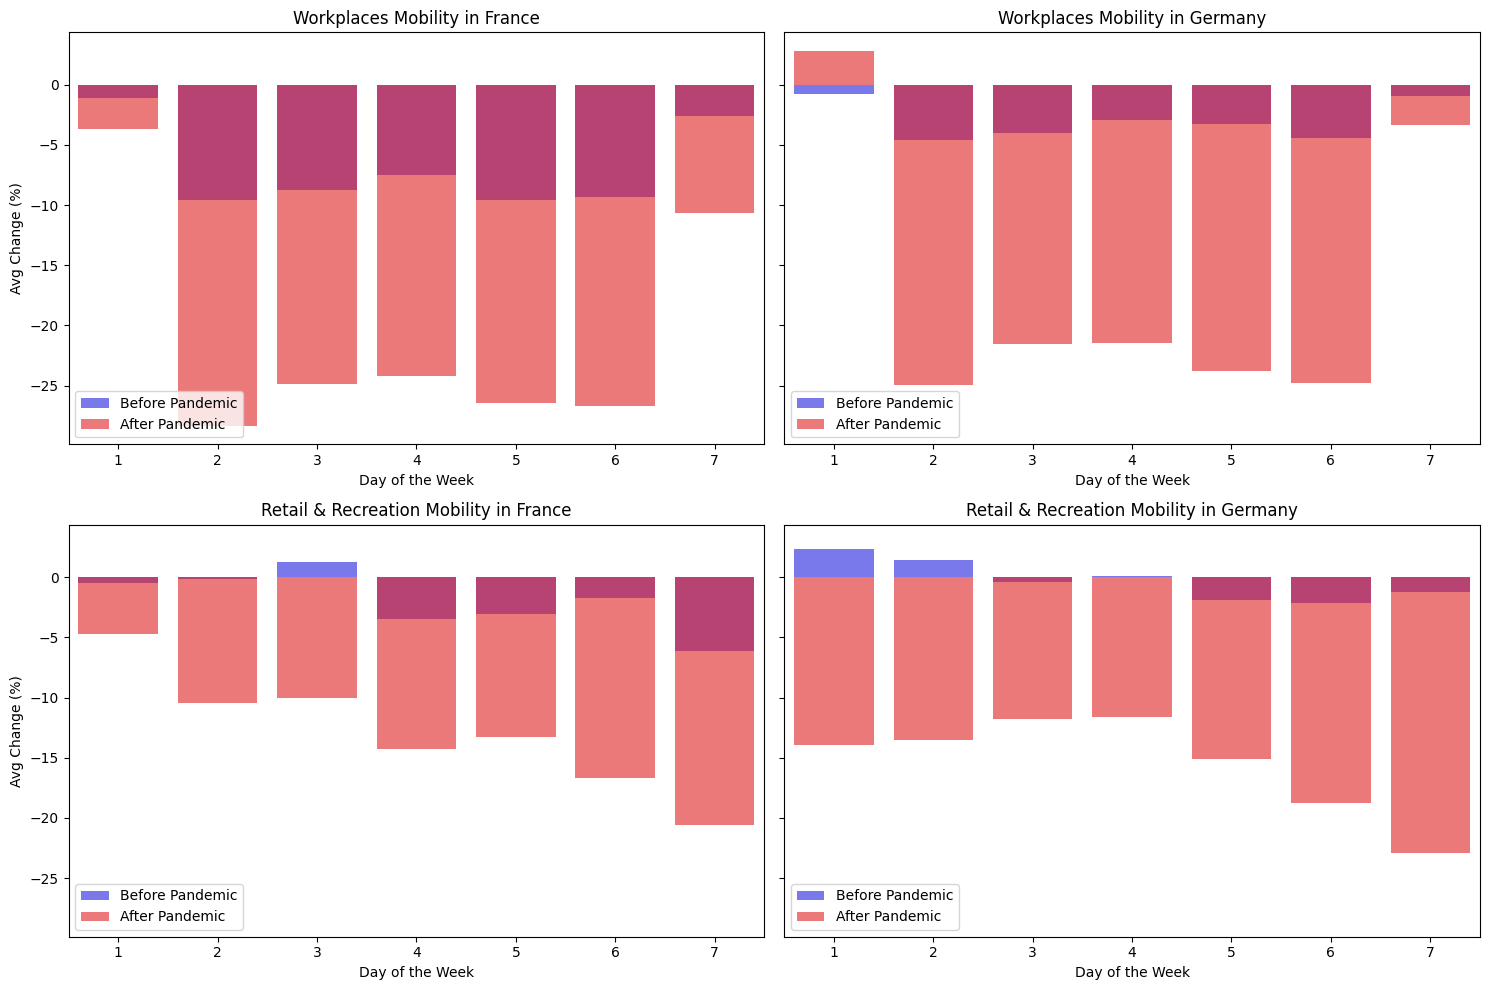

In [20]:
# data_mobility_days_workplace_recreation_fr_ge 
workplaces_df = data_mobility_days_workplace_recreation_fr_ge[['country_region', 'day_of_week', 'period', 'avg_workplaces']]
retail_recreation_df = data_mobility_days_workplace_recreation_fr_ge[['country_region', 'day_of_week', 'period', 'avg_retail_recreation']]

# Création des graphiques
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

for idx, country in enumerate(['France', 'Germany']):
    subset_workplaces = workplaces_df[workplaces_df['country_region'] == country]
    subset_retail = retail_recreation_df[retail_recreation_df['country_region'] == country]

    sns.barplot(ax=axes[0, idx], data=subset_workplaces[subset_workplaces['period'] == 'before_pandemic'],
                x='day_of_week', y='avg_workplaces', color='blue', alpha=0.6, label='Before Pandemic')
    sns.barplot(ax=axes[0, idx], data=subset_workplaces[subset_workplaces['period'] == 'after_pandemic'],
                x='day_of_week', y='avg_workplaces', color='red', alpha=0.6, label='After Pandemic')
    axes[0, idx].set_title(f'Workplaces Mobility in {country}')
    axes[0, idx].set_xlabel('Day of the Week')
    axes[0, idx].set_ylabel('Avg Change (%)')
    axes[0, idx].legend()

    sns.barplot(ax=axes[1, idx], data=subset_retail[subset_retail['period'] == 'before_pandemic'],
                x='day_of_week', y='avg_retail_recreation', color='blue', alpha=0.6, label='Before Pandemic')
    sns.barplot(ax=axes[1, idx], data=subset_retail[subset_retail['period'] == 'after_pandemic'],
                x='day_of_week', y='avg_retail_recreation', color='red', alpha=0.6, label='After Pandemic')
    axes[1, idx].set_title(f'Retail & Recreation Mobility in {country}')
    axes[1, idx].set_xlabel('Day of the Week')
    axes[1, idx].set_ylabel('Avg Change (%)')
    axes[1, idx].legend()


plt.savefig("Workplaces - Mobility FR GE", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )
plt.tight_layout()
plt.show()

##### Méthode 2

In [35]:
csv_file_name = "q4_4_days_workplace_recreation_avg_tendance_mobilite_FR_GR_2.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_days_workplace_recreation_fr_ge_2 = pd.read_csv(path + csv_file_name)

In [38]:
data_mobility_days_workplace_recreation_fr_ge_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_region         28 non-null     object 
 1   period                 28 non-null     object 
 2   name_day_of_week       28 non-null     object 
 3   day_of_week            28 non-null     int64  
 4   avg_retail_recreation  28 non-null     float64
 5   avg_workplaces         28 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ KB


In [44]:
data_mobility_days_workplace_recreation_fr_ge_2 = data_mobility_days_workplace_recreation_fr_ge_2.sort_values(by="day_of_week")

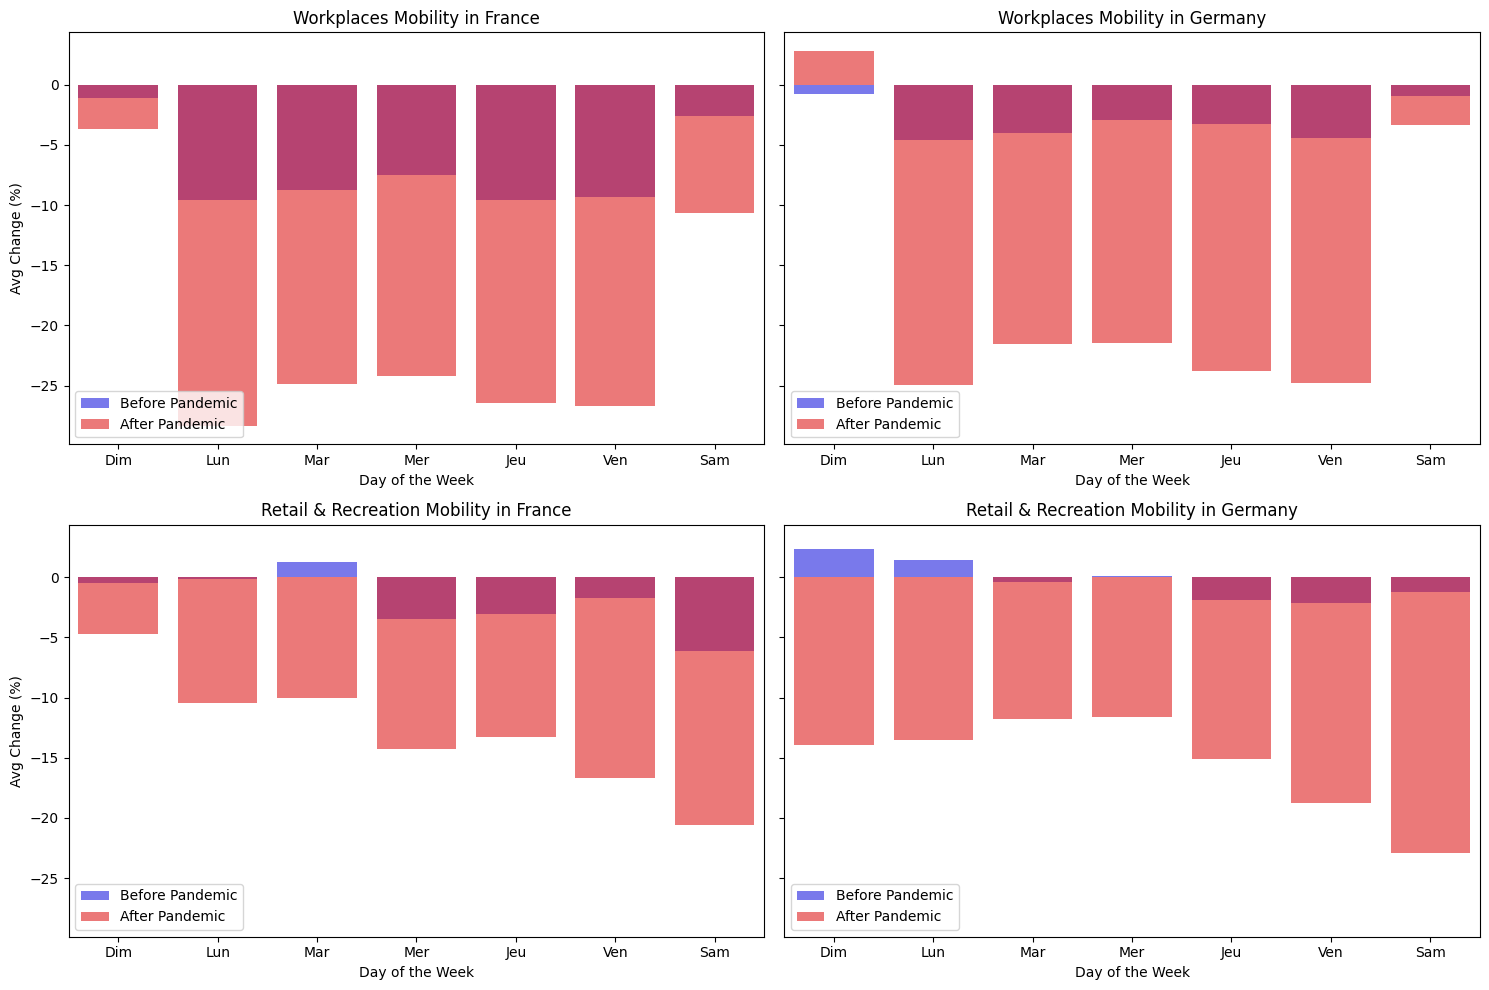

In [46]:
# data_mobility_days_workplace_recreation_fr_ge
workplaces_df = data_mobility_days_workplace_recreation_fr_ge_2[['country_region', 'name_day_of_week', 'period', 'avg_workplaces']]
retail_recreation_df = data_mobility_days_workplace_recreation_fr_ge_2[['country_region', 'name_day_of_week', 'period', 'avg_retail_recreation']]

# Création des graphiques
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

for idx, country in enumerate(['France', 'Germany']):
    subset_workplaces = workplaces_df[workplaces_df['country_region'] == country]
    subset_retail = retail_recreation_df[retail_recreation_df['country_region'] == country]

    sns.barplot(ax=axes[0, idx], data=subset_workplaces[subset_workplaces['period'] == 'before_pandemic'],
                x='name_day_of_week', y='avg_workplaces', color='blue', alpha=0.6, label='Before Pandemic')
    sns.barplot(ax=axes[0, idx], data=subset_workplaces[subset_workplaces['period'] == 'after_pandemic'],
                x='name_day_of_week', y='avg_workplaces', color='red', alpha=0.6, label='After Pandemic')
    axes[0, idx].set_title(f'Workplaces Mobility in {country}')
    axes[0, idx].set_xlabel('Day of the Week')
    axes[0, idx].set_ylabel('Avg Change (%)')
    axes[0, idx].legend()

    sns.barplot(ax=axes[1, idx], data=subset_retail[subset_retail['period'] == 'before_pandemic'],
                x='name_day_of_week', y='avg_retail_recreation', color='blue', alpha=0.6, label='Before Pandemic')
    sns.barplot(ax=axes[1, idx], data=subset_retail[subset_retail['period'] == 'after_pandemic'],
                x='name_day_of_week', y='avg_retail_recreation', color='red', alpha=0.6, label='After Pandemic')
    axes[1, idx].set_title(f'Retail & Recreation Mobility in {country}')
    axes[1, idx].set_xlabel('Day of the Week')
    axes[1, idx].set_ylabel('Avg Change (%)')
    axes[1, idx].legend()


plt.savefig("Workplaces - Mobility FR GE _2", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )
plt.tight_layout()
plt.show()

#### Y a-t-il des variations saisonnières dans les tendances de mobilité ?

In [21]:
csv_file_name = "q4_5_season_avg_tendance_mobilite_FR_GR.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_season_avg_fr_ge = pd.read_csv(path + csv_file_name)

In [22]:
data_mobility_season_avg_fr_ge.head()

,country_region,season,avg_retail_recreation,avg_grocery_pharmacy,avg_parks,avg_transit_stations,avg_workplaces,avg_residential
0,France,Autumn,-8.454806,12.713625,53.121025,7.689822,-14.311201,3.549378
1,France,Spring,-31.114115,1.558190,26.454885,-17.800928,-25.689592,9.744226
2,France,Summer,7.032128,25.930141,150.843110,27.386321,-19.520524,3.185098
3,France,Winter,-18.513738,9.411522,7.832478,-10.503172,-20.728392,6.663102
4,Germany,Autumn,-5.505831,12.824416,75.297134,-6.488854,-12.064265,3.720135


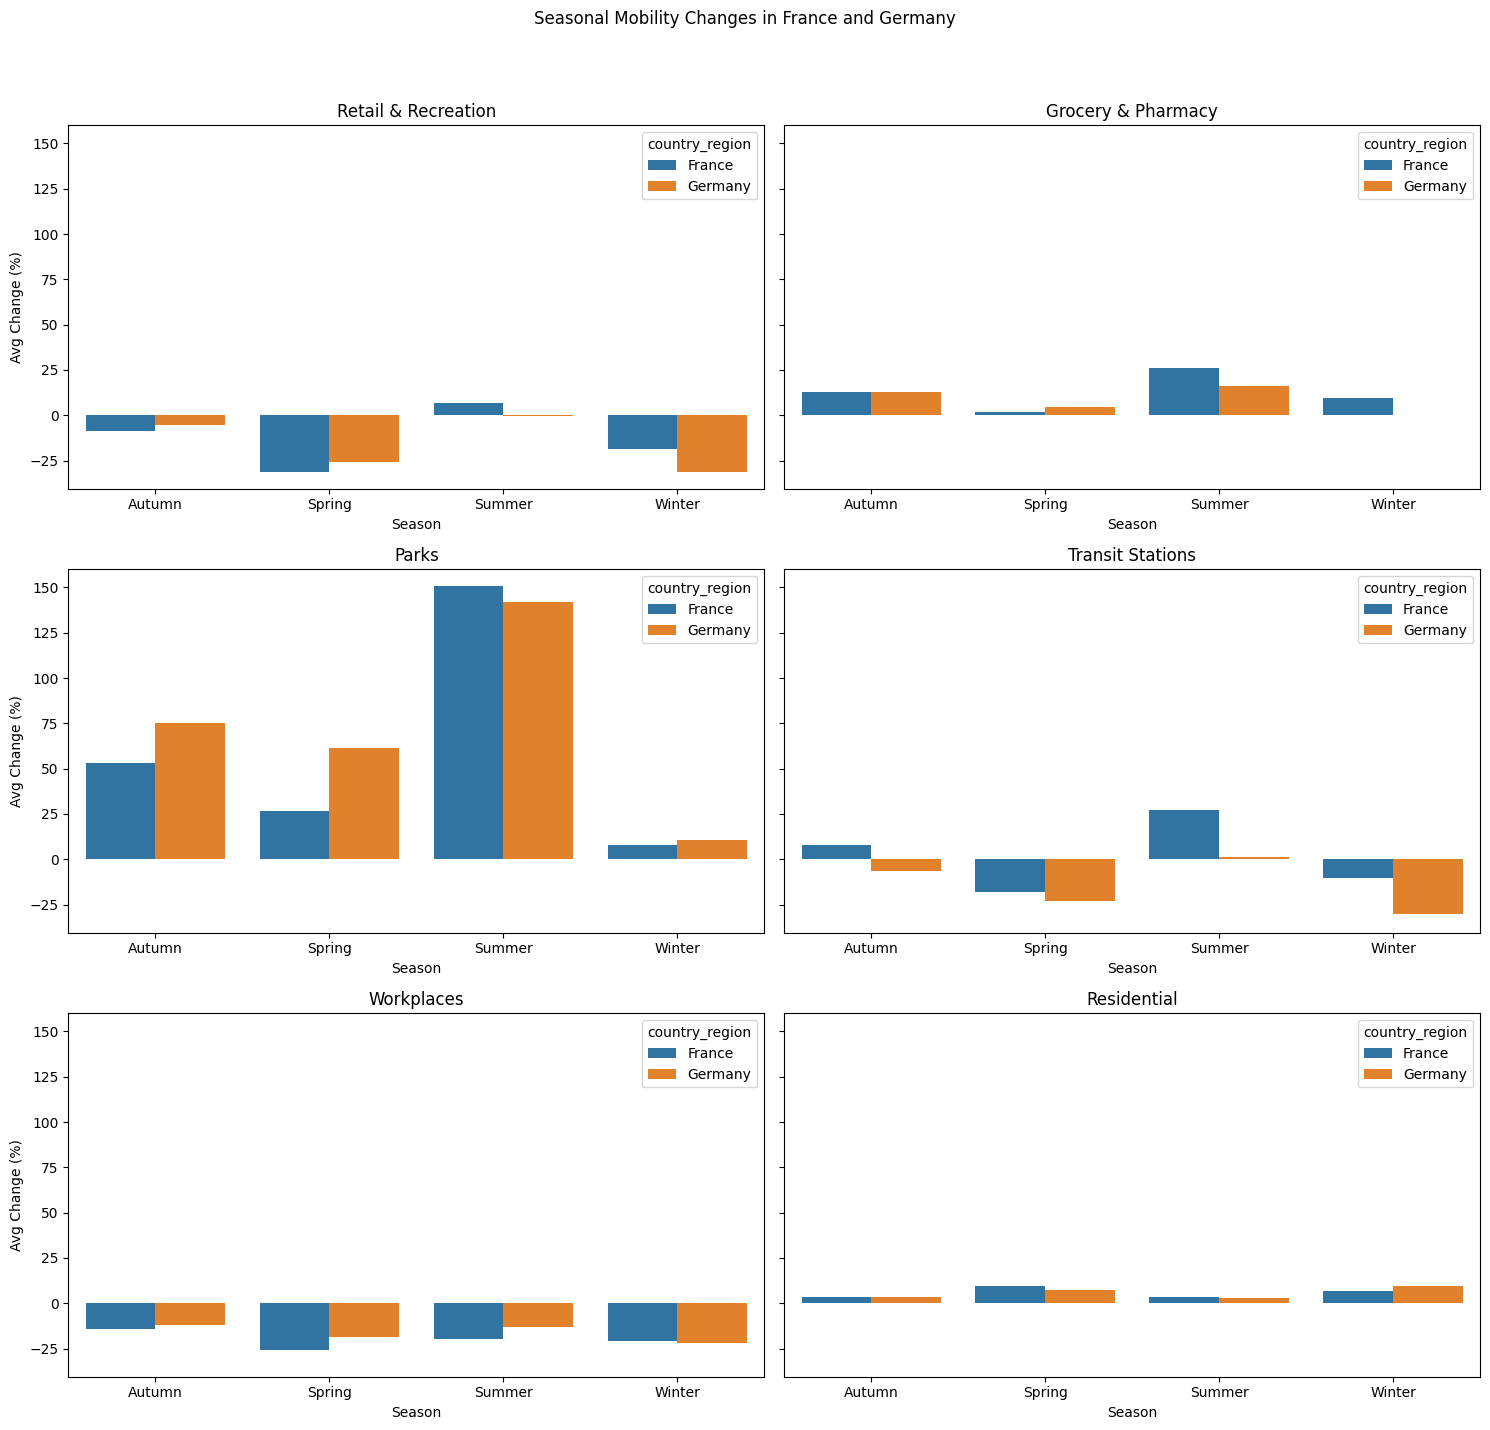

In [23]:

metrics = ['avg_retail_recreation', 'avg_grocery_pharmacy', 'avg_parks',
           'avg_transit_stations', 'avg_workplaces', 'avg_residential']

titles = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']

# Création des graphiques
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey=True)
fig.suptitle('Seasonal Mobility Changes in France and Germany')

for i, ax in enumerate(axes.flat):
    metric = metrics[i]
    sns.barplot(data=data_mobility_season_avg_fr_ge, x='season', y=metric, hue='country_region', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Season')
    ax.set_ylabel('Avg Change (%)')

plt.savefig("Seasonal Mobility Changes in France and Germany", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

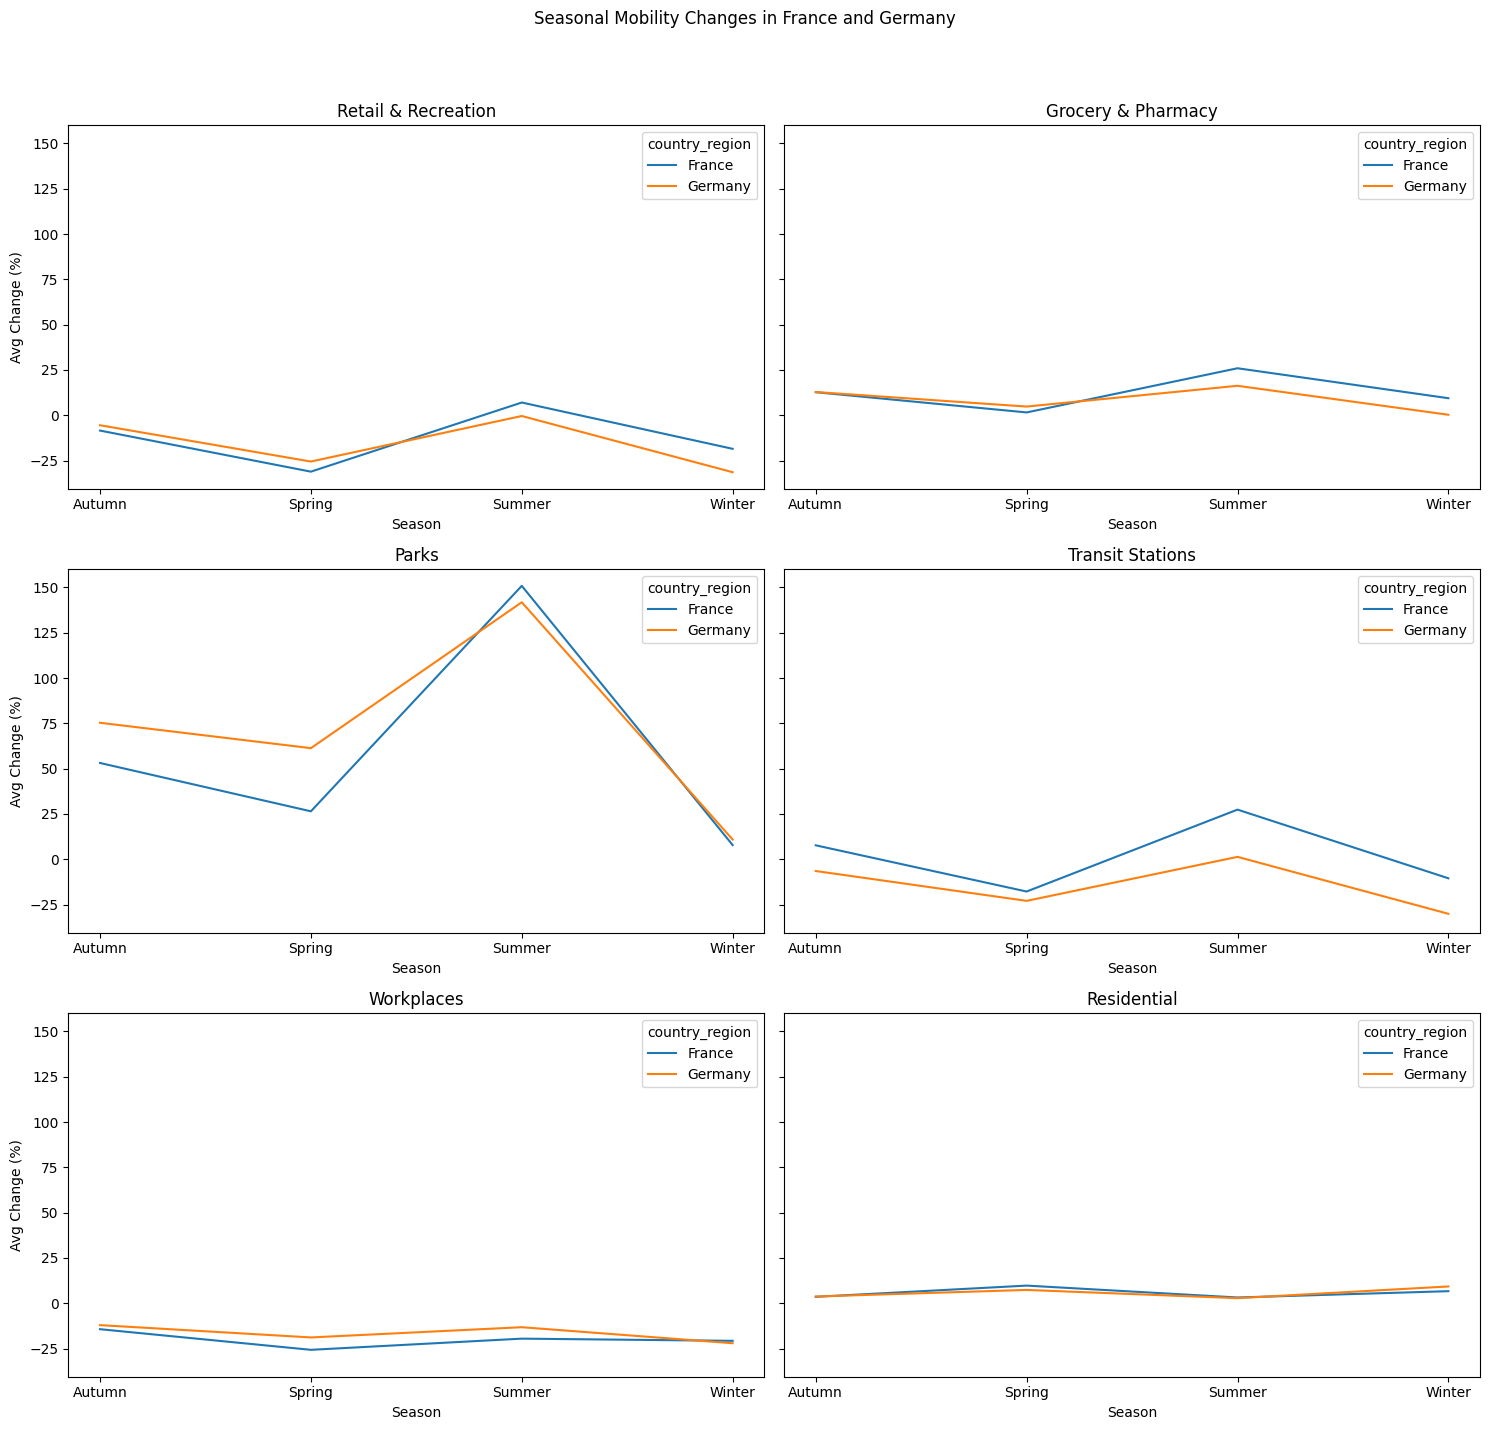

In [24]:
# Création des graphiques
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey=True)
fig.suptitle('Seasonal Mobility Changes in France and Germany')

for i, ax in enumerate(axes.flat):
    metric = metrics[i]
    sns.lineplot(data=data_mobility_season_avg_fr_ge, x='season', y=metric, hue='country_region', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Season')
    ax.set_ylabel('Avg Change (%)')

plt.savefig("Seasonal Mobility Changes in France and Germany _ 2", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Analyse approfondie

#### Mobilité par région

In [20]:
csv_file_name = "analyse_app_mobility_region_FR_GE.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_regions_FR_GE = pd.read_csv(path + csv_file_name)

In [5]:
data_mobility_regions_FR_GE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_region         29 non-null     object 
 1   sub_region_1           29 non-null     object 
 2   avg_retail_recreation  29 non-null     float64
 3   avg_grocery_pharmacy   29 non-null     float64
 4   avg_parks              29 non-null     float64
 5   avg_transit_stations   29 non-null     float64
 6   avg_workplaces         29 non-null     float64
 7   avg_residential        29 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.9+ KB


In [6]:
data_mobility_regions_FR_GE.head()

,country_region,sub_region_1,avg_retail_recreation,avg_grocery_pharmacy,avg_parks,avg_transit_stations,avg_workplaces,avg_residential
0,France,Auvergne-Rhône-Alpes,-22.626283,4.323409,31.813142,-13.714579,-23.922998,6.456879
1,France,Bourgogne-Franche-Comté,-15.311088,8.654004,56.184536,0.624230,-19.112936,5.889117
2,France,Brittany,-9.958932,20.408624,114.089598,2.159138,-17.246407,5.251540
3,France,Centre-Val de Loire,-16.895277,7.122177,48.154639,1.226899,-21.666324,6.102669
4,France,Corsica,20.317176,32.238195,165.454768,41.432034,-11.098140,2.913223


In [8]:
data_mobility_regions_FR_GE['sub_region_1'].value_counts()

sub_region_1
Auvergne-Rhône-Alpes          1
Berlin                        1
Schleswig-Holstein            1
Saxony-Anhalt                 1
Saxony                        1
Saarland                      1
Rhineland-Palatinate          1
North Rhine-Westphalia        1
Mecklenburg-Vorpommern        1
Lower Saxony                  1
Hessen                        1
Hamburg                       1
Bremen                        1
Brandenburg                   1
Bavaria                       1
Bourgogne-Franche-Comté       1
Baden-Württemberg             1
Île-de-France                 1
Provence-Alpes-Côte d'Azur    1
Pays de la Loire              1
Occitanie                     1
Nouvelle-Aquitaine            1
Normandy                      1
Hauts-de-France               1
Grand Est                     1
Corsica                       1
Centre-Val de Loire           1
Brittany                      1
Thuringia                     1
Name: count, dtype: int64

In [17]:
retail_recreation_df = data_mobility_regions_FR_GE.groupby(['sub_region_1', 'country_region']).agg({'avg_retail_recreation': 'mean'}).reset_index()
retail_recreation_df = retail_recreation_df.pivot(index='sub_region_1',columns= 'country_region', values='avg_retail_recreation').reset_index()

In [21]:
work_places_df = data_mobility_regions_FR_GE.groupby(['sub_region_1', 'country_region']).agg({'avg_workplaces': 'mean'}).reset_index()
work_places_df = work_places_df.pivot(index='sub_region_1',columns= 'country_region', values='avg_workplaces').reset_index()

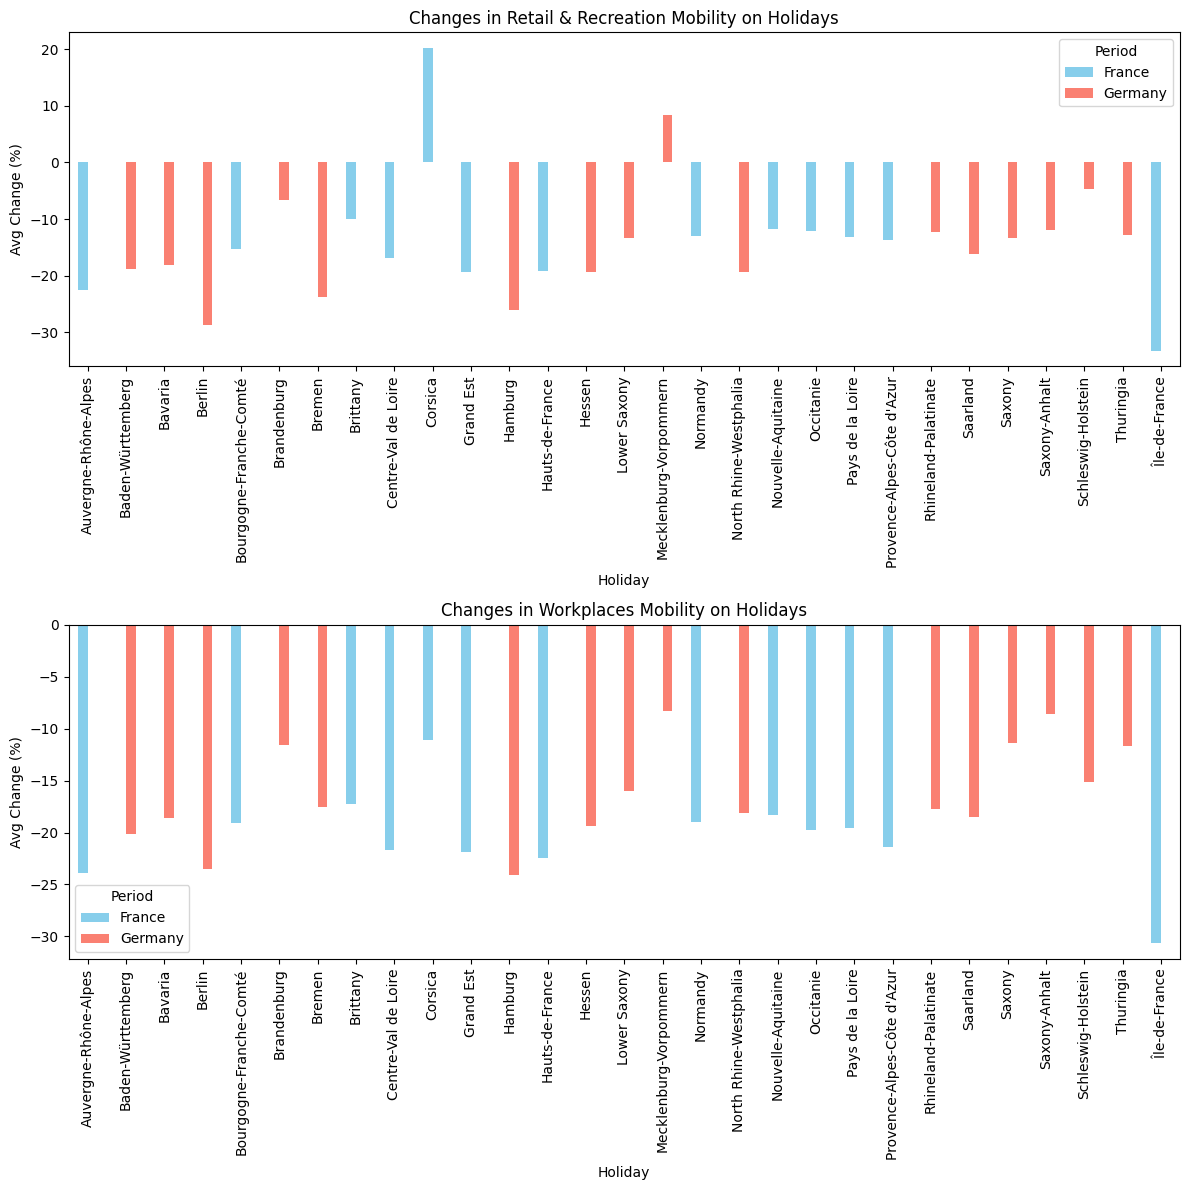

In [22]:
# Création des graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Graphique pour Retail & Recreation
retail_recreation_df.plot(kind='bar', x='sub_region_1', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Changes in Retail & Recreation Mobility on Holidays')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Avg Change (%)')
axes[0].legend(title='Period')

# Graphique pour Workplaces
work_places_df.plot(kind='bar', x='sub_region_1', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Changes in Workplaces Mobility on Holidays')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Avg Change (%)')
axes[1].legend(title='Period')

plt.savefig("Changes_in_Retail_and_Recreation_Mobility_Sub_Region", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

plt.tight_layout()
plt.show()

#### Impact jours fériés 

In [52]:
csv_file_name = "analyse_app_mobility_region__jours_feries_FR_GE.csv"
path = "/home/dai/Documents/Python_Projects/sql/briefs_simplon/tp2_bigquery/data/data_tp2/"
data_mobility_jours_feries_fr_ge = pd.read_csv(path + csv_file_name)

In [53]:
data_mobility_jours_feries_fr_ge.head()

,country_region,holiday_name,period,avg_retail_recreation,avg_workplaces
0,France,Armistice,after_pandemic,-74.672727,-79.854545
1,France,Ascension,after_pandemic,-54.963636,-76.645455
2,France,Assomption,after_pandemic,-15.527273,-25.318182
3,France,Fête Nationale,after_pandemic,-20.945455,-74.600000
4,France,Fête du Travail,after_pandemic,-91.000000,-86.245455


In [54]:
data_mobility_jours_feries_fr_ge.value_counts('period')

period
after_pandemic    18
Name: count, dtype: int64

In [27]:
# Agrégation des doublons en prenant la moyenne
retail_recreation_df = data_mobility_jours_feries_fr_ge.groupby(['holiday_name', 'period']).agg({'avg_retail_recreation': 'mean'}).reset_index()
retail_recreation_df = retail_recreation_df.pivot(index='holiday_name', columns='period', values='avg_retail_recreation').reset_index()


In [29]:
retail_recreation_df.head()

period,holiday_name,after_pandemic
0,Armistice,-74.672727
1,Ascension,-54.687701
2,Assomption,-15.527273
3,Fête Nationale,-34.384492
4,Fête du Travail,-86.529412


In [32]:
workplaces_df = data_mobility_jours_feries_fr_ge.groupby(['holiday_name', 'period']).agg({'avg_workplaces': 'mean'}).reset_index()
workplaces_df = workplaces_df.pivot(index='holiday_name', columns='period', values='avg_workplaces').reset_index()

In [33]:
workplaces_df.head()

period,holiday_name,after_pandemic
0,Armistice,-79.854545
1,Ascension,-78.234492
2,Assomption,-25.318182
3,Fête Nationale,-53.741176
4,Fête du Travail,-84.710963


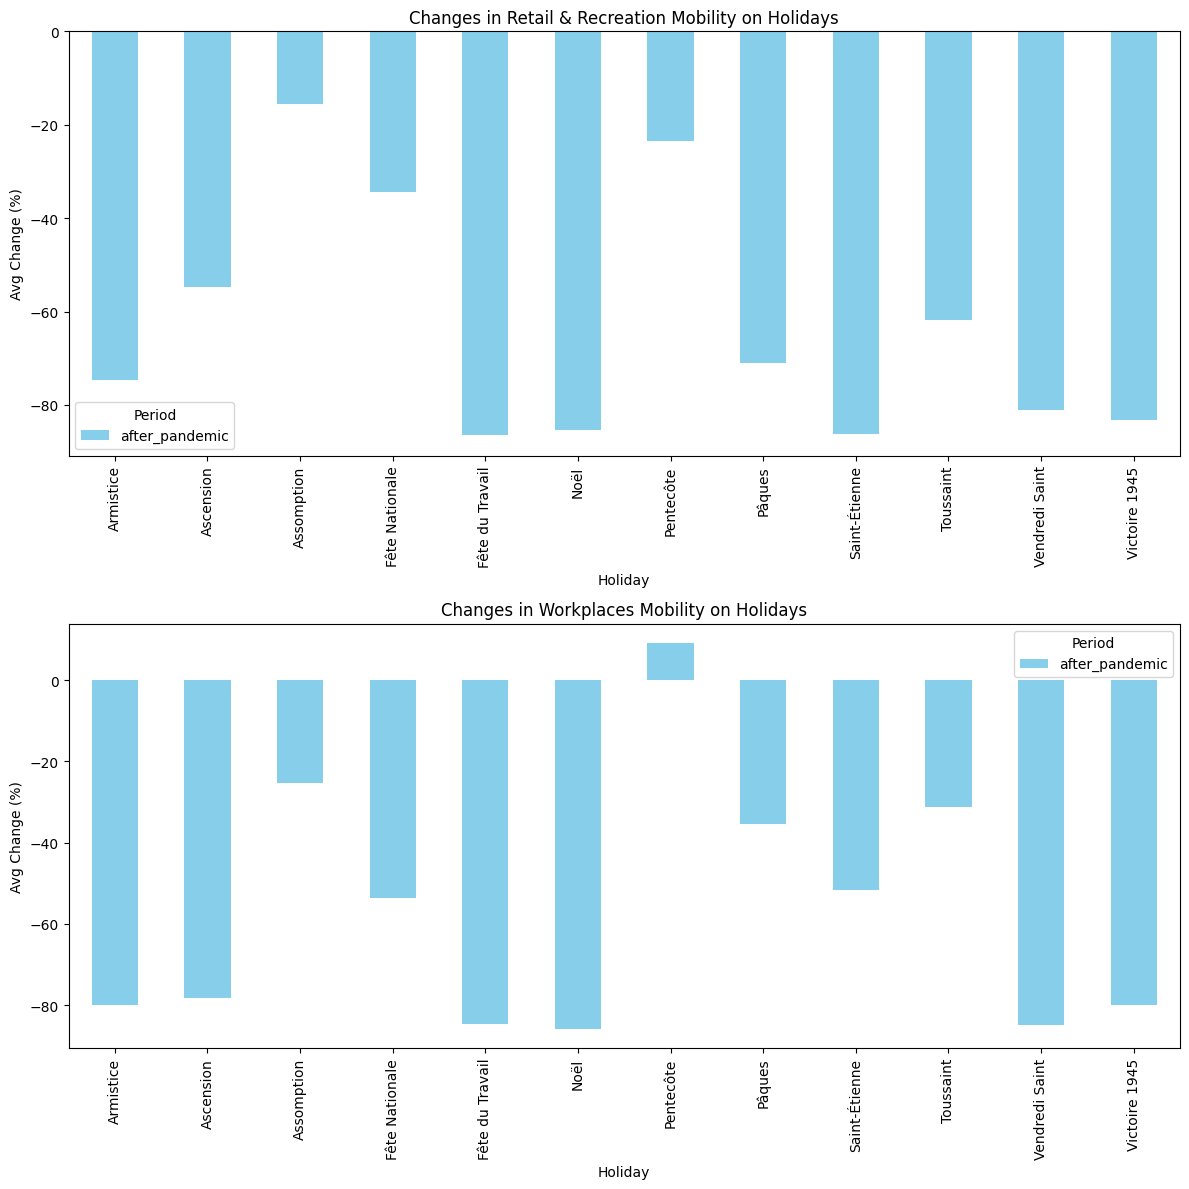

In [34]:
# Création des graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Graphique pour Retail & Recreation
retail_recreation_df.plot(kind='bar', x='holiday_name', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Changes in Retail & Recreation Mobility on Holidays')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Avg Change (%)')
axes[0].legend(title='Period')

# Graphique pour Workplaces
workplaces_df.plot(kind='bar', x='holiday_name', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Changes in Workplaces Mobility on Holidays')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Avg Change (%)')
axes[1].legend(title='Period')

plt.savefig("Changes_in_Retail_and_Recreation_Mobility_On_Holidays", transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None
       )

plt.tight_layout()
plt.show()